# File for Producing Visuals Based on Data Gathered in Src

## Imports:

In [1]:
from helpers import extract_numbers_from_file, plot_endhost_execution_times

## Endhost:

In [2]:
rtt_filepath = "../src/telemetry/endhost/results/rtt_execution_time.txt"
packet_counting_filepath = "../src/telemetry/endhost/results/packet_counting_execution_time.txt"
jitter_filepath = "../src/telemetry/endhost/results/jitter_execution_time.txt"

rtt_numbers = extract_numbers_from_file(rtt_filepath)
packet_counting_numbers = extract_numbers_from_file(packet_counting_filepath)
jitter_numbers = extract_numbers_from_file(jitter_filepath)

print("RTT Numbers:", rtt_numbers)
print("Packet Counting Numbers:", packet_counting_numbers)
print("Jitter Numbers:", jitter_numbers)

RTT Numbers: [372.03, 388.42, 368.24, 359.64, 352.29, 362.09, 356.73, 356.02, 362.88, 380.53, 373.66, 369.45, 377.38, 367.88, 387.28]
Packet Counting Numbers: [365.74, 393.7, 361.53, 358.6, 360.95, 361.61, 354.41, 356.49, 342.29, 377.75, 373.93, 376.71, 388.71, 389.35, 385.21]
Jitter Numbers: [357.23, 389.53, 361.42, 358.34, 363.85, 354.79, 360.28, 355.91, 364.65, 352.01, 393.33, 387.87, 393.9, 381.97, 374.86]


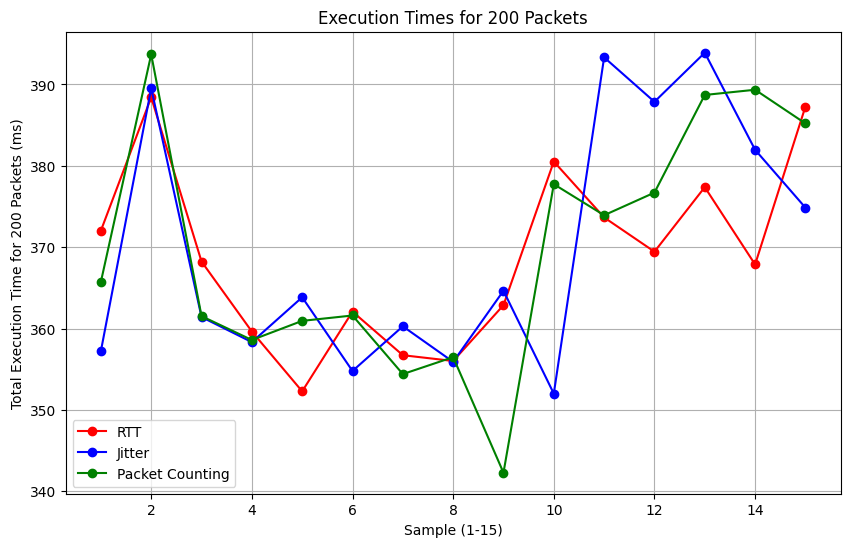

In [3]:
plot_endhost_execution_times(rtt_numbers, jitter_numbers, packet_counting_numbers)